<a href="https://colab.research.google.com/github/emichester/07MIAR_Redes_Neuronales_y_Deep_Learning/blob/main/SesionesNotebooks/Sesion_4_5_6/07MIAR_VC04_VC05_Deep_Vision_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 07MAIR - Redes Neuronales y Deep Learning
## VC04_V05: Deep Learning y Deep vision

In [ ]:
# SOLO PARA USO EN GOOGLE COLABORATORY
# Para conectar el notebook con la cuenta de gdrive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

In [ ]:
BASE_FOLDER = '/content/drive/My Drive/ASIGNATURAS/VIU/07MIAR_Redes_Neuronales_y_Deep_Learning/recursos' # Se debe garantizar que la carpeta docencia compartida se almacena en el directorio raíz de Google Drive. En caso contrario modificar este path

In [ ]:
# Funciones base

import matplotlib.pyplot as plt
import numpy as np

def visualize_learning_curve(H):
  epochs = len(H.history["loss"])
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()

from sklearn.metrics import classification_report

def evaluate_model(model, x, y):
  print("[INFO]: Evaluando red neuronal...")
  predictions = model.predict(x, batch_size=128)
  print(classification_report(y, predictions.argmax(axis=1)))

## **INTRODUCCIÓN A LAS CONVOLUTIONAL NEURAL NETWORKS: MNIST DATASET**

#### **- Cargando el conjunto de datos**

In [ ]:
# Cargar dataset de mnist
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)


#### **- Acondicionando el conjunto de datos**

In [ ]:
# Pre-procesado obligatorio cuando trabajo con redes neuronales
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.backend import expand_dims

# Normalizamos entre 0 y 1
x_tr, x_te = x_train/255, x_test/255

# particion
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# añadir canal en el array
x_tr = np.expand_dims(x_tr, axis=3)
x_val = np.expand_dims(x_val, axis=3)
x_te = np.expand_dims(x_te, axis=3)

#### **- Creando la topología de Red Neuronal (CNN) y entrenándola**

In [ ]:
# Construccion de una red CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Red feedforward API secuencial
convnet = Sequential()

# BASE MODEL
# Bloque 1
convnet.add(layers.Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu', padding='same'))
convnet.add(layers.MaxPooling2D((2,2)))
# Bloque 2
convnet.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
convnet.add(layers.MaxPooling2D((2,2)))
# Bloque 3
convnet.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
convnet.add(layers.MaxPooling2D((2,2)))

# TOP MODEL
convnet.add(layers.Flatten())
convnet.add(layers.Dense(64, activation='relu'))
convnet.add(layers.Dense(10, activation='softmax'))

convnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 64)          0

In [ ]:
# Compilación
convnet.compile(
    optimizer='Adam',
    loss = 'sparse_categorical_crossentropy', # para cuando se usan diréctamente etiquetas categóricas
    # loss = 'categorical_crossentropy', # para cuando se usan etiquetas en One Hot Encoding e.g. [0 0 1 0 0]
    metrics = ['accuracy']
)

A mayor tamaño de las imágenes menor batch size. Para reducir la carga computacional y la memoria que se utiliza.

In [ ]:
# Entrenamiento
H = convnet.fit(x_tr, y_tr, batch_size=128, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
422/422 [==============================] - 14s 7ms/step - loss: 0.5072 - accuracy: 0.8993 - val_loss: 0.1142 - val_accuracy: 0.9623
Epoch 2/5
422/422 [==============================] - 3s 6ms/step - loss: 0.0693 - accuracy: 0.9785 - val_loss: 0.0555 - val_accuracy: 0.9835
Epoch 3/5
422/422 [==============================] - 3s 7ms/step - loss: 0.0479 - accuracy: 0.9847 - val_loss: 0.0702 - val_accuracy: 0.9800
Epoch 4/5
422/422 [==============================] - 2s 5ms/step - loss: 0.0376 - accuracy: 0.9886 - val_loss: 0.0611 - val_accuracy: 0.9813
Epoch 5/5
422/422 [==============================] - 2s 5ms/step - loss: 0.0280 - accuracy: 0.9914 - val_loss: 0.0511 - val_accuracy: 0.9845


#### **- Observando el proceso de entrenamiento para tomar decisiones**

In [ ]:
def show_model_performance(H, n_epochs):
    axis_x = np.arange(0, n_epochs)

    plt.style.use("ggplot")
    plt.figure()
    plt.plot(axis_x, H.history["loss"], label="train_loss")
    plt.plot(axis_x, H.history["val_loss"], label="val_loss")
    plt.plot(axis_x, H.history["accuracy"], label="accuracy")
    plt.plot(axis_x, H.history["val_accuracy"], label="val_accuracy")
    plt.title("Learning curve")
    plt.xlabel("Epoch Number")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.show()

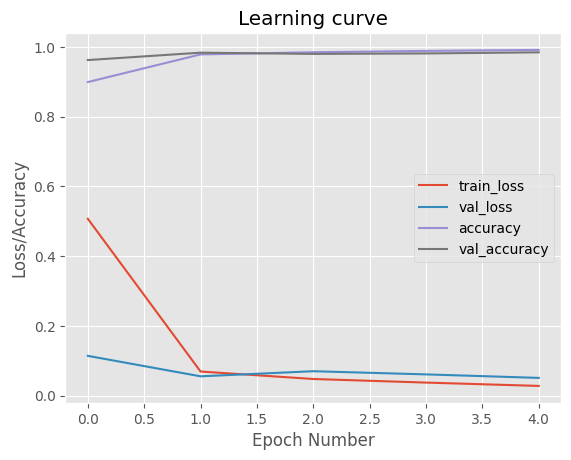

In [ ]:
show_model_performance(H, 5)

[INFO]: Evaluando red neuronal...
79/79 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       980
           1       0.40      1.00      0.58      1135
           2       0.87      0.65      0.74      1032
           3       0.93      0.94      0.93      1010
           4       0.54      1.00      0.70       982
           5       1.00      0.42      0.59       892
           6       1.00      0.05      0.10       958
           7       0.92      0.91      0.92      1028
           8       1.00      0.35      0.52       974
           9       0.70      0.63      0.66      1009

    accuracy                           0.69     10000
   macro avg       0.83      0.68      0.66     10000
weighted avg       0.82      0.69      0.67     10000



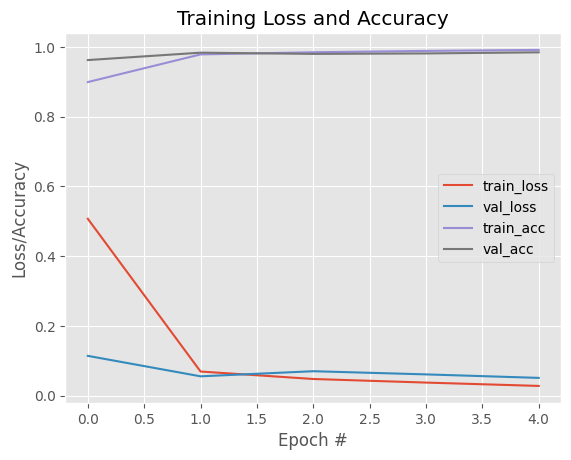

In [ ]:
# Evaluación + Testeo

# Learning curves
visualize_learning_curve(H)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(convnet, x_te, y_test)


## **¿POR QUE CONVOLUTIONAL NEURAL NETWORKS?: CIFAR DATASET**

#### **- Cargando el conjunto de datos y acondicionándolo**

Imágenes naturales

In [ ]:
# Importando el set de datos CIFAR10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.backend import expand_dims
from tensorflow.keras.datasets import cifar10
labelNames = ["Avión", "Automóvil", "Pájaro", "Gato", "Ciervo", "Perro", "Rana", "Caballo", "Barco", "Camión"]

print("[INFO]: Loading CIFAR-10 data...")
((x_train, y_train), (x_test, y_test)) = cifar10.load_data()

# Normalizar intensidad de imagenes
x_tr, x_te = x_train.astype("float") / 255, x_test.astype("float")  / 255

# Particion de los datos: train/val split
x_tr, x_val, y_tr, y_val = train_test_split(x_tr, y_train, test_size=0.1, random_state=42)

print(x_tr.shape)
print(y_tr.shape)

[INFO]: Loading CIFAR-10 data...
170498071/170498071 [==============================] - 8s 0us/step
(45000, 32, 32, 3)
(45000, 1)


#### **- Inspeccionando el conjunto de datos**

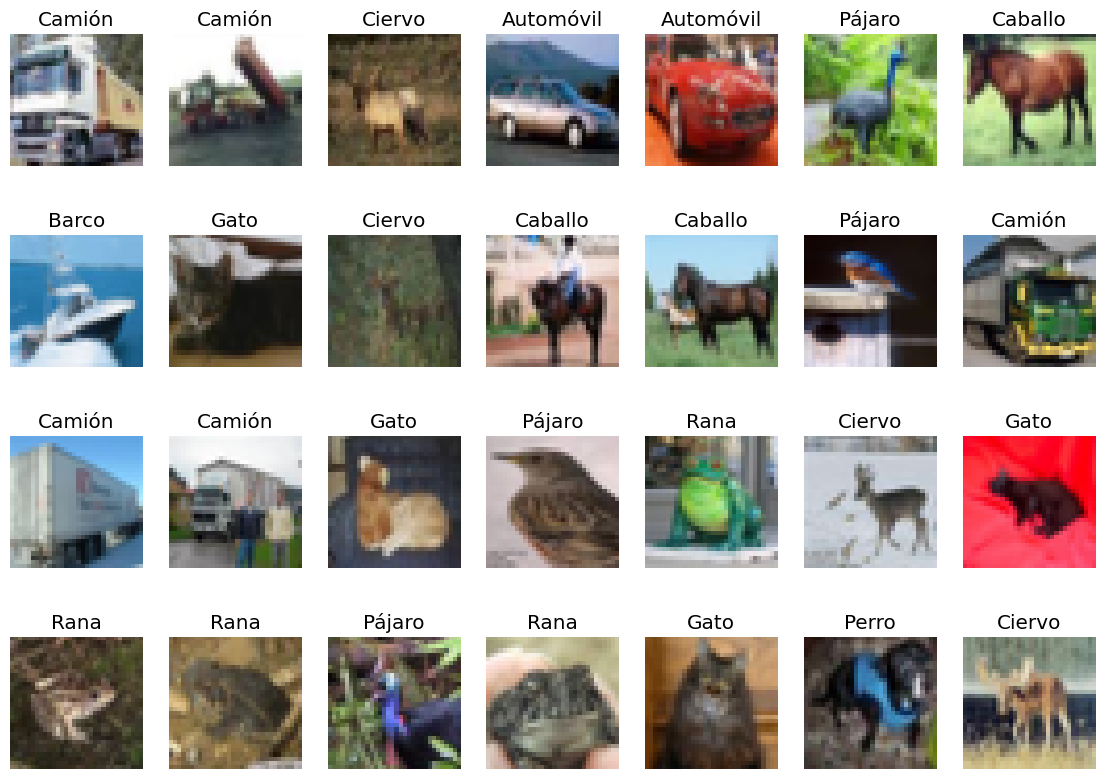

In [ ]:
# Inspección del conjunto de datos
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14, 10))
for n in range(1, 29):
  fig.add_subplot(4, 7, n)
  img = x_train[n]
  plt.imshow(img)
  plt.title(labelNames[y_train[n][0]])
  plt.axis("off")

#### **- Creando la topología de red neuronal y entrenándola: MLP**

In [ ]:
# Imports necesarios
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD

# Arquitectura de red - modo API Sequential

mlp = Sequential()
mlp.add(Flatten())
mlp.add(Dense(2048, input_shape=(32*32*3,), activation="relu"))
mlp.add(Dense(1024, activation="relu"))
mlp.add(Dense(512, activation="relu"))
mlp.add(Dense(128, activation="relu"))
mlp.add(Dense(32, activation="relu"))
mlp.add(Dense(10, activation="softmax"))

In [ ]:
# Compilamos el modelo y entrenamos

mlp.compile(optimizer=SGD(learning_rate=0.01),
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"]
            )

In [ ]:
# Entrenamos el perceptrón multicapa
print("[INFO]: Entrenando la red neuronal...")
H = mlp.fit(x_tr, y_tr, epochs=10, batch_size=128, validation_data=(x_val, y_val))

[INFO]: Entrenando la red neuronal...
Epoch 1/10
352/352 [==============================] - 5s 10ms/step - loss: 2.0266 - accuracy: 0.2616 - val_loss: 1.8687 - val_accuracy: 0.3394
Epoch 2/10
352/352 [==============================] - 2s 6ms/step - loss: 1.8282 - accuracy: 0.3494 - val_loss: 1.7928 - val_accuracy: 0.3530
Epoch 3/10
352/352 [==============================] - 2s 6ms/step - loss: 1.7296 - accuracy: 0.3853 - val_loss: 1.7179 - val_accuracy: 0.3784
Epoch 4/10
352/352 [==============================] - 2s 6ms/step - loss: 1.6621 - accuracy: 0.4116 - val_loss: 1.7101 - val_accuracy: 0.3828
Epoch 5/10
352/352 [==============================] - 2s 6ms/step - loss: 1.6105 - accuracy: 0.4302 - val_loss: 1.6454 - val_accuracy: 0.4042
Epoch 6/10
352/352 [==============================] - 2s 6ms/step - loss: 1.5709 - accuracy: 0.4431 - val_loss: 1.5673 - val_accuracy: 0.4370
Epoch 7/10
352/352 [==============================] - 3s 8ms/step - loss: 1.5360 - accuracy: 0.4577 - val_los

[INFO]: Evaluando red neuronal...
79/79 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.37      0.71      0.49      1000
           1       0.63      0.49      0.55      1000
           2       0.38      0.29      0.33      1000
           3       0.38      0.26      0.31      1000
           4       0.35      0.53      0.42      1000
           5       0.49      0.25      0.33      1000
           6       0.50      0.51      0.51      1000
           7       0.53      0.50      0.51      1000
           8       0.53      0.61      0.56      1000
           9       0.62      0.45      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.48      0.46      0.45     10000
weighted avg       0.48      0.46      0.45     10000



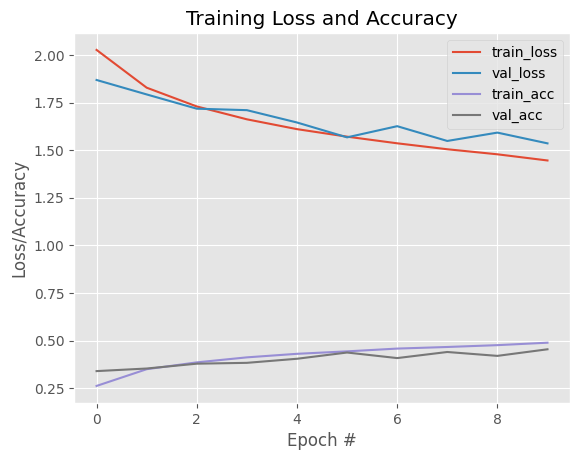

In [ ]:
# Learning curves
visualize_learning_curve(H)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(mlp, x_te, y_test)

#### **- Creando la topología de red neuronal y entrenándola: CNN**

In [ ]:
# Arquitectura de red - modo API Functional
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# 1.BASE MODEL
input = layers.Input(shape=(x_tr.shape[1], x_tr.shape[2], x_tr.shape[3]))

# Bloque 1
x1 = layers.Conv2D(32, (3,3), padding="same", activation="relu")(input)
x1 = layers.BatchNormalization()(x1)
x1 = layers.Conv2D(32, (3,3), padding="same", activation="relu")(x1)
x1 = layers.BatchNormalization()(x1)
x1 = layers.MaxPooling2D(pool_size=(2,2))(x1)
# se podría añadir Dropout
# Bloque 2
x2 = layers.Conv2D(64, (3,3), padding="same", activation="relu")(x1)
x2 = layers.BatchNormalization()(x2)
x2 = layers.Conv2D(64, (3,3), padding="same", activation="relu")(x2)
x2 = layers.BatchNormalization()(x2)
x2 = layers.MaxPooling2D(pool_size=(2,2))(x2)
# Bloque 3
x3 = layers.Conv2D(256, (3,3), padding="same", activation="relu")(x2)
x3 = layers.BatchNormalization()(x3)
x3 = layers.Conv2D(256, (3,3), padding="same", activation="relu")(x3)
x3 = layers.BatchNormalization()(x3)
x3 = layers.MaxPooling2D(pool_size=(2,2))(x3)

# 2.TOP MODEL
# también se pueden concatenar dos redes con layers.Concatenate para
# redes más complejas
xfc = layers.Flatten()(x3)
xfc = layers.Dense(512, activation="relu")(xfc)
xfc = layers.BatchNormalization()(xfc)
# Se podria añadir dropout
predictions = layers.Dense(10, activation="softmax")(xfc)

# 3. Unimos las entradas y salidas del modelo
model_cnn = Model(inputs=input, outputs=predictions)

model_cnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0     

In [ ]:
# Compilamos el modelo y entrenamos
model_cnn.compile(optimizer=Adam(learning_rate=0.001),
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"]
            )

In [ ]:
# Entrenamos la CNN
print("[INFO]: Entrenando la red neuronal...")
H = model_cnn.fit(x_tr, y_tr, epochs=10, batch_size=128, validation_data=(x_val, y_val))

[INFO]: Entrenando la red neuronal...
Epoch 1/10
352/352 [==============================] - 15s 23ms/step - loss: 1.1683 - accuracy: 0.5921 - val_loss: 2.6330 - val_accuracy: 0.2382
Epoch 2/10
352/352 [==============================] - 7s 19ms/step - loss: 0.7316 - accuracy: 0.7429 - val_loss: 0.8186 - val_accuracy: 0.7162
Epoch 3/10
352/352 [==============================] - 8s 21ms/step - loss: 0.5377 - accuracy: 0.8098 - val_loss: 0.8797 - val_accuracy: 0.7128
Epoch 4/10
352/352 [==============================] - 7s 19ms/step - loss: 0.3929 - accuracy: 0.8614 - val_loss: 0.8608 - val_accuracy: 0.7330
Epoch 5/10
352/352 [==============================] - 7s 20ms/step - loss: 0.2670 - accuracy: 0.9062 - val_loss: 0.7430 - val_accuracy: 0.7716
Epoch 6/10
352/352 [==============================] - 7s 19ms/step - loss: 0.1672 - accuracy: 0.9428 - val_loss: 0.8127 - val_accuracy: 0.7784
Epoch 7/10
352/352 [==============================] - 7s 20ms/step - loss: 0.1143 - accuracy: 0.9604 - 

[INFO]: Evaluando red neuronal...
79/79 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0       0.69      0.90      0.78      1000
           1       0.91      0.87      0.89      1000
           2       0.80      0.58      0.67      1000
           3       0.58      0.70      0.63      1000
           4       0.76      0.69      0.73      1000
           5       0.74      0.69      0.71      1000
           6       0.91      0.73      0.81      1000
           7       0.76      0.85      0.81      1000
           8       0.80      0.88      0.84      1000
           9       0.89      0.83      0.86      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



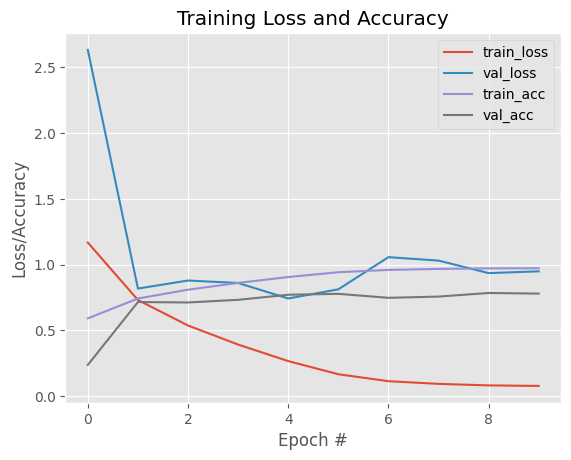

In [ ]:
# Learning curves
visualize_learning_curve(H)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(model_cnn, x_te, y_test)

# Almaceno el modelo en Drive

## **REDUCIENDO OVERFITTING MEDIANTE DATA AUGMENTATION**

#### **- Acondicionando dataset**

In [ ]:
# Binarizar etiquetas - por si es necesario convertir de categorical a one-hot encoding
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

y_tr_ohe = lb.fit_transform(y_tr)
y_val_ohe = lb.transform(y_val)
y_test_ohe = lb.transform(y_test)

print(y_tr_ohe.shape)

(45000, 10)


#### **- Creando un contenedor DataGenerator para el aumento automático de muestras**

**Únicamente trabaja con etiquetas en ONE HOT ENCODING. Por ello transformamos previamente.**

In [ ]:
# Crear Image DataGenerator, únicamente trabaja con etiquetas en ONE HOT ENCODING
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    zoom_range = 0.2
)

#### **- Inspeccionando las muestras generadas sintéticamente**

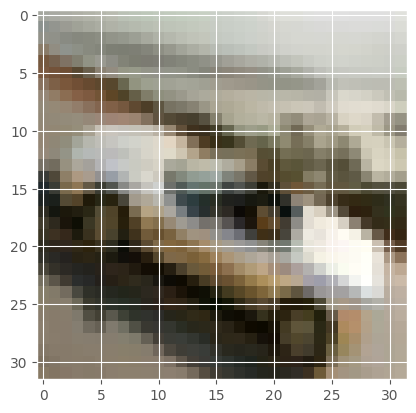

Label = Automóvil


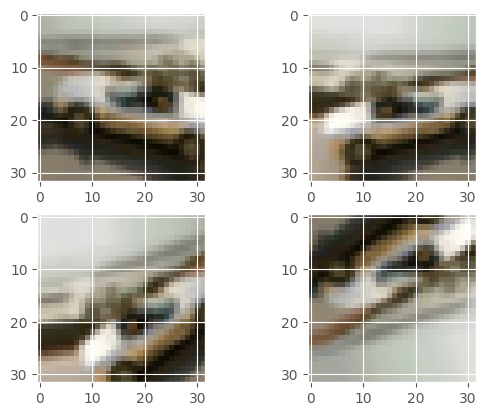

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

# sample = 45
sample = 101
plt.imshow(image.array_to_img(x_tr[sample]))
plt.show()
# si se hace el binarizado de las etiquetas con OHE
# print('Label = {}'.format(labelNames[trainY[sample].argmax(axis=0)]))
print('Label = {}'.format(labelNames[y_tr[sample][0]]))

fig, axes = plt.subplots(2,2)
i = 0
for batch in datagen.flow(x_tr[sample].reshape((1,32,32,3)),batch_size=1):
    #plt.figure(i)
    axes[i//2,i%2].imshow(image.array_to_img(batch[0]))
    i += 1
    if i == 4:
        break
plt.show()

Le pasamos al generador una muestra
```python
x_tr[sample].reshape((1,32,32,3))
```

usando flow
```python
datagen.flow(x_tr[sample].reshape((1,32,32,3)),batch_size=1)
```

#### **- Creando la topología de red neuronal y entrenándola: CNN**

In [ ]:
# Arquitectura de red - modo API Functional
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Definición de hiperparámetros
batch_size = 128
learning_rate = 0.001
epochs = 10
num_classes = 10

# 1.BASE MODEL
input = layers.Input(shape=(x_tr.shape[1], x_tr.shape[2], x_tr.shape[3]))

# Bloque 1
x1 = layers.Conv2D(32, (3,3), padding="same", activation="relu")(input)
x1 = layers.BatchNormalization()(x1)
x1 = layers.Conv2D(32, (3,3), padding="same", activation="relu")(x1)
x1 = layers.BatchNormalization()(x1)
x1 = layers.MaxPooling2D(pool_size=(2,2))(x1)
# se podría añadir Dropout
# Bloque 2
x2 = layers.Conv2D(64, (3,3), padding="same", activation="relu")(x1)
x2 = layers.BatchNormalization()(x2)
x2 = layers.Conv2D(64, (3,3), padding="same", activation="relu")(x2)
x2 = layers.BatchNormalization()(x2)
x2 = layers.MaxPooling2D(pool_size=(2,2))(x2)
# Bloque 3
x3 = layers.Conv2D(256, (3,3), padding="same", activation="relu")(x2)
x3 = layers.BatchNormalization()(x3)
x3 = layers.Conv2D(256, (3,3), padding="same", activation="relu")(x3)
x3 = layers.BatchNormalization()(x3)
x3 = layers.MaxPooling2D(pool_size=(2,2))(x3)

# 2.TOP MODEL
# también se pueden concatenar dos redes con layers.Concatenate para
# redes más complejas
xfc = layers.Flatten()(x3)
xfc = layers.Dense(512, activation="relu")(xfc)
xfc = layers.BatchNormalization()(xfc)
# Se podria añadir dropout
predictions = layers.Dense(num_classes, activation="softmax")(xfc)

# 3. Unimos las entradas y salidas del modelo
model_cnn_aug = Model(inputs=input, outputs=predictions)

model_cnn_aug.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_8 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0   

In [ ]:
# Compilamos el modelo y entrenamos
model_cnn_aug.compile(optimizer=Adam(learning_rate=learning_rate),
            loss="categorical_crossentropy", # quitamos sparse, porque estamos en OHE
            metrics=["accuracy"]
            )

**EJERCICIO PROPUESTO:** Modificar la ejecución con Data Augmentation para que sea directamente comparable a la ejecución por defecto. Para ello, el validation data debe ser correcto. Pista: Llevar a cabo el validation split cuando se instancia el objeto ImageDataGenerator. El método flow también se verá afectado (leer documentación).

In [ ]:
# Entrenamos la CNN
print("[INFO]: Entrenando la red neuronal...")
H = model_cnn_aug.fit(  datagen.flow(x_tr, y_tr_ohe, batch_size=batch_size),
                        epochs=epochs,
                        steps_per_epoch=x_tr.shape[0] // batch_size,
                        validation_data=(x_val, y_val_ohe)
)

[INFO]: Entrenando la red neuronal...
Epoch 1/10
351/351 [==============================] - 38s 91ms/step - loss: 1.6592 - accuracy: 0.4081 - val_loss: 3.2984 - val_accuracy: 0.2016
Epoch 2/10
351/351 [==============================] - 31s 88ms/step - loss: 1.3353 - accuracy: 0.5191 - val_loss: 1.1883 - val_accuracy: 0.5794
Epoch 3/10
351/351 [==============================] - 32s 91ms/step - loss: 1.1631 - accuracy: 0.5832 - val_loss: 1.6773 - val_accuracy: 0.4974
Epoch 4/10
351/351 [==============================] - 31s 89ms/step - loss: 1.0605 - accuracy: 0.6213 - val_loss: 1.3306 - val_accuracy: 0.5894
Epoch 5/10
351/351 [==============================] - 35s 99ms/step - loss: 0.9835 - accuracy: 0.6517 - val_loss: 1.1672 - val_accuracy: 0.6198
Epoch 6/10
351/351 [==============================] - 31s 89ms/step - loss: 0.9152 - accuracy: 0.6751 - val_loss: 0.9597 - val_accuracy: 0.6688
Epoch 7/10
351/351 [==============================] - 31s 88ms/step - loss: 0.8564 - accuracy: 0.6

[INFO]: Evaluando red neuronal...
79/79 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.59      0.78      0.67      1000
           1       0.70      0.96      0.81      1000
           2       0.74      0.47      0.57      1000
           3       0.60      0.42      0.50      1000
           4       0.90      0.47      0.61      1000
           5       0.64      0.65      0.64      1000
           6       0.72      0.84      0.77      1000
           7       0.75      0.77      0.76      1000
           8       0.76      0.90      0.82      1000
           9       0.77      0.81      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.70     10000
weighted avg       0.72      0.71      0.70     10000



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


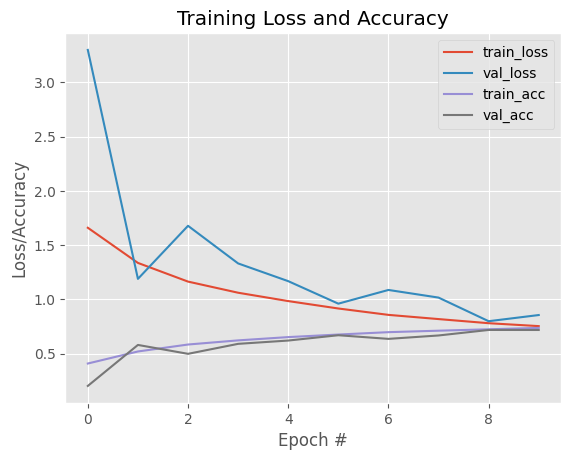

In [ ]:
# Learning curves
visualize_learning_curve(H)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(model_cnn_aug, x_te, y_test)

# Almaceno el modelo en Drive
# drive.mount("...")
import os
model_cnn_aug.save(os.path.join(BASE_FOLDER,"deepCNN_CIFAR10.h5"))

**Ojo con el _shuffle_ pues puede hacer missmatch entre imágenes y etiquetas. Si el validation loss aumenta es probable que sea por eso. Sobre todo poner el _shuffle=False_ en test**

- [Uso de flow_from_dataframe](https://vijayabhaskar96.medium.com/tutorial-on-keras-flow-from-dataframe-1fd4493d237c)
- [Uso de flow_from_directory](https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720)

``` python
train_generator = train_datagen.flow_from_directory(
    directory=r"./train/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)
```

```python
flow_from_directory(
    directory,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    follow_links=False,
    subset=None,
    interpolation='nearest',
    keep_aspect_ratio=False
)
```

```python
flow_from_dataframe(
    dataframe,
    directory=None,
    x_col='filename',
    y_col='class',
    weight_col=None,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    subset=None,
    interpolation='nearest',
    validate_filenames=True,
    **kwargs
)
```

## **TRABAJANDO CON REDES PRE-ENTRENADAS: TRANSFER LEARNING & FINE-TUNING**


#### **- Cargando el conjunto de datos y acondicionándolo como en la VGG**

In [ ]:
# Imports necesarios

# Importando y normalizando el set de datos CIFAR10

# One-hot encoding

# IMPORTANTE: Se normalizan los datos como se normalizaron en el entrenamiento con ImageNet!!


#### **- Cargando la topología de CNN (base model)**

In [ ]:
# keras incluye varias arquitecturas
# VGG16, VGG19, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, RasNet
# documentacion https://keras.io/applications/
# Visual Geometry Group 16 / 19 (numero de layers)
# 1 y 2 en la competicion ImageNet 2014
# Kernels pequeños de 3x3

# Definición de hiperparámetros
batch_size = 128
learning_rate = 0.001
epochs = 10
num_classes = 10

from tensorflow.keras.applications import VGG16

# Cargar arquitectura y pesos
base_model = VGG16(weights="imagenet",
                   include_top=False,
                   input_shape=(32,32,3))

base_model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

#### **- Creando el top model y congelando TODAS las capas convolucionales (TRANSFER LEARNING)**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
# transfer learning, no entrenamos el base_model
base_model.trainable = False

# Conectar el modelo con el top model
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(256, activation='relu'))
pre_trained_model.add(layers.Dense(10, activation='softmax'))
pre_trained_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               131328    
                                                                 
 dense_13 (Dense)            (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 133898 (523.04 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
# Compilamos el modelo y entrenamos
pre_trained_model.compile(optimizer=Adam(learning_rate=learning_rate),
            loss="categorical_crossentropy", # quitamos sparse, porque estamos en OHE
            metrics=["accuracy"]
            )

#### **- Entrenando la solución**

In [ ]:
# Entrenamos la CNN
print("[INFO]: Entrenando la red neuronal...")
H = pre_trained_model.fit(x_tr, y_tr_ohe,
                          batch_size=batch_size,
                        epochs=epochs,
                        # steps_per_epoch=x_tr.shape[0] // batch_size,
                        validation_data=(x_val, y_val_ohe)
)

[INFO]: Entrenando la red neuronal...
Epoch 1/10
352/352 [==============================] - 10s 23ms/step - loss: 1.4281 - accuracy: 0.5060 - val_loss: 1.2577 - val_accuracy: 0.5504
Epoch 2/10
352/352 [==============================] - 7s 21ms/step - loss: 1.2125 - accuracy: 0.5776 - val_loss: 1.1926 - val_accuracy: 0.5794
Epoch 3/10
352/352 [==============================] - 7s 19ms/step - loss: 1.1532 - accuracy: 0.6005 - val_loss: 1.1624 - val_accuracy: 0.5880
Epoch 4/10
352/352 [==============================] - 7s 19ms/step - loss: 1.1108 - accuracy: 0.6136 - val_loss: 1.1392 - val_accuracy: 0.5936
Epoch 5/10
352/352 [==============================] - 7s 21ms/step - loss: 1.0754 - accuracy: 0.6265 - val_loss: 1.1363 - val_accuracy: 0.6036
Epoch 6/10
352/352 [==============================] - 7s 19ms/step - loss: 1.0443 - accuracy: 0.6394 - val_loss: 1.1083 - val_accuracy: 0.6030
Epoch 7/10
352/352 [==============================] - 7s 19ms/step - loss: 1.0164 - accuracy: 0.6478 - 

[INFO]: Evaluando red neuronal...
79/79 [==============================] - 2s 18ms/step
              precision    recall  f1-score   support

           0       0.63      0.74      0.68      1000
           1       0.63      0.73      0.68      1000
           2       0.63      0.44      0.52      1000
           3       0.45      0.43      0.44      1000
           4       0.59      0.54      0.56      1000
           5       0.58      0.51      0.54      1000
           6       0.61      0.71      0.66      1000
           7       0.66      0.69      0.67      1000
           8       0.68      0.78      0.73      1000
           9       0.67      0.56      0.61      1000

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.61     10000
weighted avg       0.61      0.61      0.61     10000



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


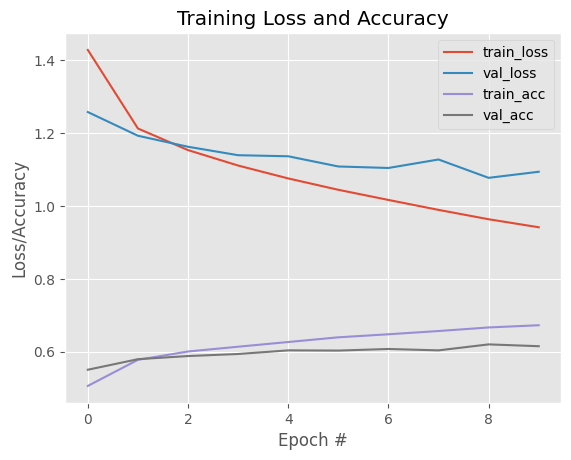

In [ ]:
# Learning curves
visualize_learning_curve(H)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(pre_trained_model, x_te, y_test)

# Almaceno el modelo en Drive
# drive.mount("...")
import os
model_cnn_aug.save(os.path.join(BASE_FOLDER,"transferLearningVGG16_CIFAR10.h5"))

#### **- Creando el top model y descongelando bloques convolucionales (FINE TUNING)**

In [ ]:
# Imports que vamos a necesitar

# Cargamos el dataset CIFAR10

# Normalizamos las entradas de idéntica forma a como lo hicieron para entrenar la VGG16 en imageNet

# Definimos dimensiones de nuestros datos de entrada y lista con las categorias de las clases

# En caso de inestabilidades numéricas pasar datos a one-hot encoding

# Definición de hiperparámetros
batch_size = 128
learning_rate = 0.001
epochs = 10
num_classes = 10

# Importamos VGG16 con pesos de imagenet y sin top_model especificando tamaño de entrada de datos
from tensorflow.keras.applications import VGG16

# Cargar arquitectura y pesos
base_model = VGG16(weights="imagenet",
                   include_top=False,
                   input_shape=(32,32,3))

# Mostramos la arquitectura
base_model.summary()

# Congelamos las capas de los 4 primeros bloques convolucionales, el quinto se re-entrena
# En base_model.layers.name tenemos la información del nombre de la capa
# Congelamos parcialmente
for layer in base_model.layers:
    if layer.name == "block3_conv1":
        break
    layer.trainable = False
    print("Capa ", layer.name, " congelada...")

# Cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Conectar el modelo con el top model
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(256, activation='relu'))
pre_trained_model.add(layers.Dense(10, activation='softmax'))
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compilamos el modelo y entrenamos
pre_trained_model.compile(optimizer=Adam(learning_rate=learning_rate),
            loss="categorical_crossentropy", # quitamos sparse, porque estamos en OHE
            metrics=["accuracy"]
            )

# Entrenamos la CNN
print("[INFO]: Entrenando la red neuronal...")
H = pre_trained_model.fit(x_tr, y_tr_ohe,
                        batch_size=batch_size,
                        epochs=epochs,
                        # steps_per_epoch=x_tr.shape[0] // batch_size,
                        validation_data=(x_val, y_val_ohe)
)

[INFO]: Entrenando la red neuronal...
Epoch 1/10
352/352 [==============================] - 21s 45ms/step - loss: 1.8451 - accuracy: 0.2616 - val_loss: 1.4356 - val_accuracy: 0.4562
Epoch 2/10
352/352 [==============================] - 15s 43ms/step - loss: 1.2381 - accuracy: 0.5401 - val_loss: 1.0677 - val_accuracy: 0.6262
Epoch 3/10
352/352 [==============================] - 15s 42ms/step - loss: 0.9623 - accuracy: 0.6610 - val_loss: 0.8733 - val_accuracy: 0.6962
Epoch 4/10
352/352 [==============================] - 15s 42ms/step - loss: 0.8051 - accuracy: 0.7206 - val_loss: 0.8554 - val_accuracy: 0.7222
Epoch 5/10
352/352 [==============================] - 15s 43ms/step - loss: 0.7154 - accuracy: 0.7552 - val_loss: 0.7615 - val_accuracy: 0.7474
Epoch 6/10
352/352 [==============================] - 15s 42ms/step - loss: 0.6243 - accuracy: 0.7867 - val_loss: 0.6966 - val_accuracy: 0.7690
Epoch 7/10
352/352 [==============================] - 15s 42ms/step - loss: 0.5522 - accuracy: 0.8

[INFO]: Evaluando red neuronal...
79/79 [==============================] - 1s 16ms/step
              precision    recall  f1-score   support

           0       0.76      0.83      0.80      1000
           1       0.88      0.88      0.88      1000
           2       0.70      0.70      0.70      1000
           3       0.62      0.55      0.59      1000
           4       0.79      0.69      0.74      1000
           5       0.69      0.69      0.69      1000
           6       0.77      0.88      0.82      1000
           7       0.88      0.78      0.83      1000
           8       0.87      0.91      0.89      1000
           9       0.83      0.88      0.85      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


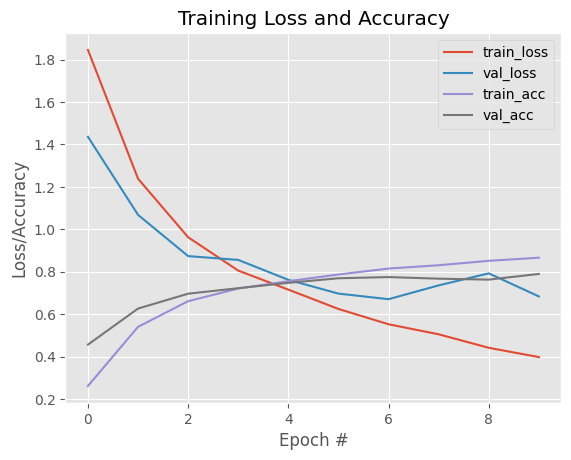

In [ ]:
# Learning curves
visualize_learning_curve(H)

# Evaluando el modelo de predicción con las imágenes de test
evaluate_model(pre_trained_model, x_te, y_test)

# Almaceno el modelo en Drive
# drive.mount("...")
import os
pre_trained_model.save(os.path.join(BASE_FOLDER,"fineTunningParcialVGG16_CIFAR10.h5"))

**EJERCICIO PROPUESTO:** Combinar fine tuning con la técnica de data augmentation para reducir overfitting.

## **VISUALIZANDO POR DENTRO UNA CNN**

#### **- Visualizar activaciones intermedias**

- Visualizar el output de las capas de la red
- 2D imagen por canal

In [ ]:
%tensorflow_version 1.x
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import LabelBinarizer

# Importando y normalizando el set de datos CIFAR10
print("[INFO]: Loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
labelNames = ["Avión", "Automóvil", "Pájaro", "Gato", "Ciervo", "Perro", "Rana", "Caballo", "Barco", "Camión"]

#One-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
from keras.models import load_model
model_augmentation = load_model(BASE_FOLDER+'resources/convnet_augmentation.h5')
model_augmentation.summary()

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img
%matplotlib inline

# Visualizando imagen
sample = 1000
input_img = trainX[sample].reshape((1,32,32,3))
plt.imshow(array_to_img(trainX[sample]))
plt.show()

In [ ]:
# Modificar el modelo para que nos devuelva los mapas de activación


In [ ]:
# Visualización de la salida de un filtro - activacion, 32 canales, feature map de 30x30


In [ ]:
# Visualización de las activaciones en todas las capas



### Interpretacion
- Capas iniciales son como detectores de bordes
- Capas más profundas son más difíciles de interpretar (abstractas) y tienen información relativa a la clase de imagen
- La activación de capas profundas es más dispersa (sparse)

#### **- Visualizar filtros convolucionales**

- Visualizar las imagenes que maximizan la respuesta a un filtro

In [ ]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet',include_top=False)
model.summary()

In [ ]:
import numpy as np

def gen_max_response_pattern(layer_name, filter_index, size=32):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:,:,:,filter_index])

    # Para obtener el patron que responde de forma máxima, utilizamos descenso del gradiente
    grads = K.gradients(loss,model.input)[0] # Seleccionar el primero, ya que esto devuelve una lista
    # Normalización para ayudar al proceso del gradiente
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5) # Última constante para evitar dividir por 0
    # Definir funcion que calcula la pérdida y el gradiente de la imagen
    iterate = K.function([model.input], [loss,grads])
    loss_value, grads_value = iterate([np.zeros((1,size,size,3))])

    # Iniciamos con imagen aleatoria
    input_img_data = np.random.random((1,size,size,3)) * 20 + 128

    step = 1. # Magnitud de cada actualizacion en el gradiente
    n_steps = 40 # Número de iteraciones
    for i in range(n_steps):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    img = input_img_data[0]
    # Procesar la imagen resultante
    img -= img.mean()
    img /= img.std() + 1e-5
    img *= 0.1
    img += 0.5
    img = np.clip(img,0,1)
    img *= 255
    img = np.clip(img,0,255).astype('uint8')

    return img

In [ ]:
# mostrar un patron para un filtro
import matplotlib.pyplot as plt
%matplotlib inline

layer_name = 'block2_conv1'
filter_index = 112 # canal a estudiar

img = gen_max_response_pattern(layer_name,filter_index,32)
plt.imshow(img)

**EJERCICIO PROPUESTO:** Mostrar los patrones de maxima activacion para todos los filtros de una capa.

#### **- Visualizar hetmaps de activación por clase**

- Útil para averiguar qué partes de la imagen contribuyen más a la decisión
- Interesante para saber qué pasa cuando se cometen errores

In [ ]:
# Técnica utiliza gradientes Ramprasaath, R. Selvaraju et al. (2017). https://arxiv.org/abs/1610.02391
from keras.applications import VGG16

model = VGG16(weights='imagenet',include_top=True)

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# Cargar imagen de gato
img = image.load_img(BASE_FOLDER+'resources/cat.jpg', target_size=(224,224))
x = image.img_to_array(img) # a array de (224,224,3)
x = np.expand_dims(x, axis=0) # a array de (1,224,224,3)
x = preprocess_input(x)

In [ ]:
# Testeando el output
prediction = model.predict(x)
print(decode_predictions(prediction))

In [ ]:
tabby_output_index = np.argmax(prediction[0])
tabby_output = model.output[:,tabby_output_index]
last_conv_layer = model.get_layer('block5_conv3')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from keras import backend as K

grads = K.gradients(tabby_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0,1,2))
iterate = K.function( [model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])

# Multiplicar cada canal en el feature map por como de importante el canal es con respecto a la clase "tabby"
for i in range(512):
    conv_layer_output_value[:,:,i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)

# Visualizar
heatmap = np.maximum(heatmap,0)
heatmap /= np.max(heatmap)
fig,axes = plt.subplots(1,2)
axes[0].matshow(heatmap)
axes[1].imshow(img)
plt.show()

**EJERCICIO PROPUESTO:** Obtener el heatmap para las otras clases en la lista de prediccion (Egyptian_cat, tiger_cat, etc.).